<a href="https://colab.research.google.com/github/kasumi35/data-analysis-basic-kadai/blob/main/nakagawasankadai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データの下処理をする

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df04 = pd.read_csv("/content/tbl_order_202004.csv")
df05 = pd.read_csv("/content/tbl_order_202005.csv")
df06 = pd.read_csv("/content/tbl_order_202006.csv")

df = pd.concat([df04,df05,df06])
df.head()
df


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1.0,4144.0,1.0
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0.0,2877.0,2.0
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0.0,2603.0,2.0
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0.0,2732.0,2.0
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0.0,2987.0,2.0
...,...,...,...,...,...,...,...,...,...,...
162089,45968263,53,C41661032,85,6281722,2020-06-21 20:19:19,2020-06-21 21:01:19,0.0,3319.0,2.0
162090,23341288,151,C27323726,78,40242712,2020-06-21 20:19:19,2020-06-21 21:16:19,0.0,2154.0,2.0
162091,48982936,26,C86672541,73,53400997,2020-06-21 20:19:19,2020-06-21 20:31:19,0.0,4144.0,2.0
162092,81240895,194,C23980365,53,71378546,2020-06-21 20:19:19,2020-06-21 21:00:19,0.0,2827.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461340 entries, 0 to 162093
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           461340 non-null  int64  
 1   store_id           461340 non-null  int64  
 2   customer_id        461340 non-null  object 
 3   coupon_cd          461340 non-null  int64  
 4   sales_detail_id    461340 non-null  int64  
 5   order_accept_date  461340 non-null  object 
 6   delivered_date     461338 non-null  object 
 7   takeout_flag       461338 non-null  float64
 8   total_amount       461338 non-null  float64
 9   status             461337 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 38.7+ MB


In [ ]:
#▼▼▼▼▼ここうまくいかない▼▼▼▼▼▼▼▼▼

#feature_names_JPN = ['注文番号', '店舗番号', 'クーポン_cd', 'セール商品ID', '配達日', '持ち帰り', '合計金額', 'ステータス']
#df.columns = feature_names_JPN
#df.head()

#▲▲▲▲▲▲▲▲▲▲▲▲▲

In [ ]:
df.describe()

,order_id,store_id,coupon_cd,sales_detail_id,takeout_flag,total_amount,status
count,4.613400e+05,461340.000000,461340.000000,4.613400e+05,461338.000000,461338.000000,461337.000000
mean,5.001145e+07,103.960773,49.496863,5.000674e+07,0.260208,2960.399215,3.084598
std,2.888275e+07,86.576386,28.894620,2.886544e+07,0.438749,954.289559,2.837891
min,7.000000e+01,1.000000,0.000000,4.600000e+01,0.000000,510.000000,1.000000
25%,2.502357e+07,51.000000,24.000000,2.503079e+07,0.000000,2308.000000,2.000000
50%,4.999943e+07,99.000000,49.000000,5.007444e+07,0.000000,2808.000000,2.000000
75%,7.507755e+07,148.000000,75.000000,7.500146e+07,1.000000,3617.000000,2.000000
max,9.999980e+07,999.000000,99.000000,9.999965e+07,1.000000,5100.000000,9.000000


In [ ]:
df.shape

(461340, 10)

ストアID　９９９
クーポンIDが９９はおかしい？

In [ ]:
!pip install japanize-matplotlib


In [ ]:
import japanize_matplotlib


array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'coupon_cd'}>],
       [<Axes: title={'center': 'sales_detail_id'}>,
        <Axes: title={'center': 'takeout_flag'}>,
        <Axes: title={'center': 'total_amount'}>],
       [<Axes: title={'center': 'status'}>, <Axes: >, <Axes: >]],
      dtype=object)

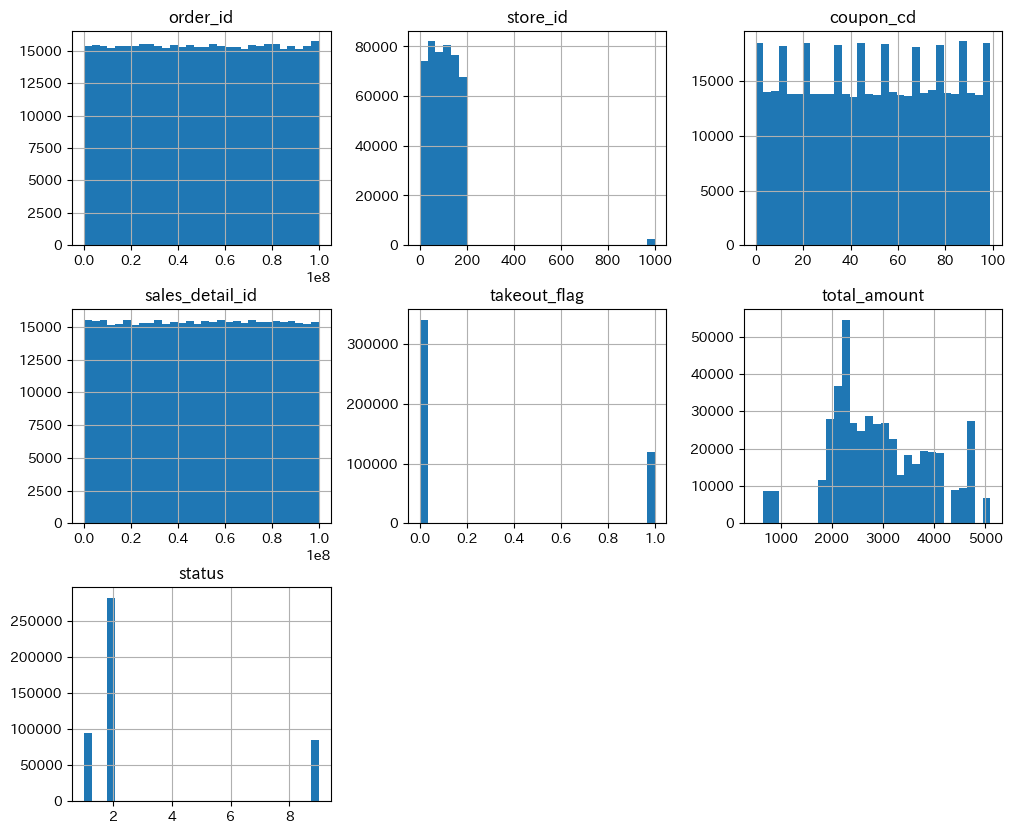

In [ ]:
df.hist(bins=30, figsize=(12, 10))


In [ ]:
df.query('store_id == 999').shape


(2510, 10)

In [ ]:
df = df[df['store_id'] != 999]


array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'coupon_cd'}>],
       [<Axes: title={'center': 'sales_detail_id'}>,
        <Axes: title={'center': 'takeout_flag'}>,
        <Axes: title={'center': 'total_amount'}>],
       [<Axes: title={'center': 'status'}>, <Axes: >, <Axes: >]],
      dtype=object)

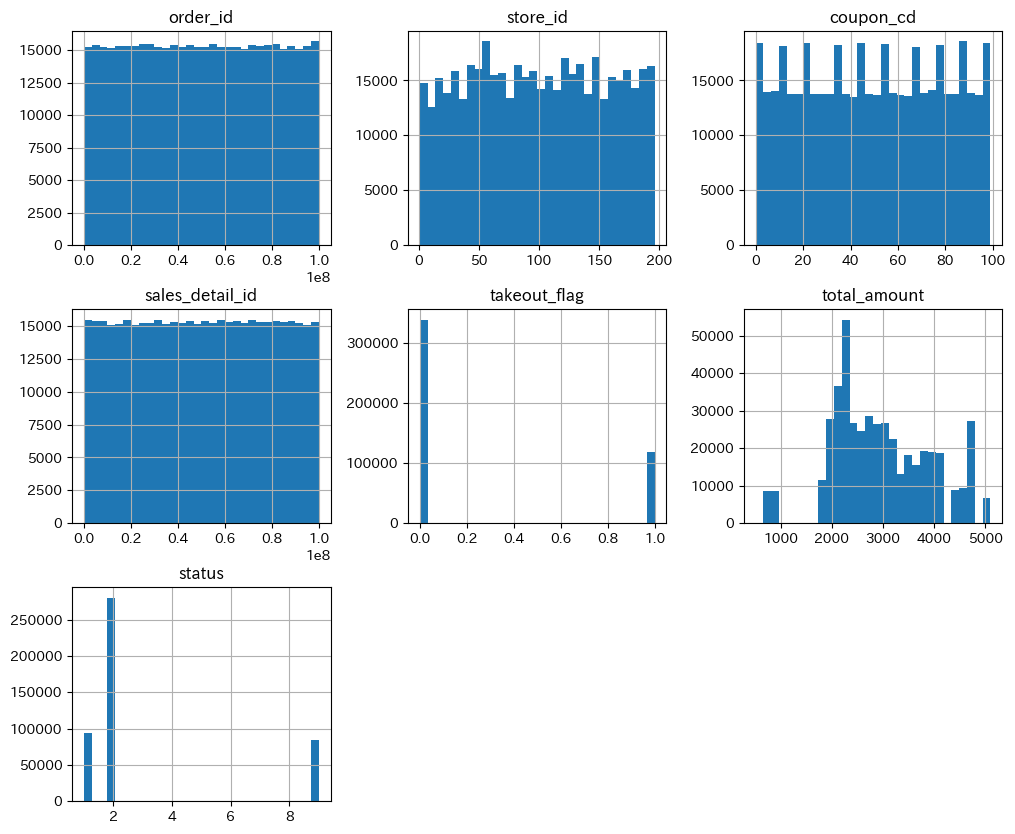

In [ ]:
df.hist(bins=30, figsize=(12, 10))


In [ ]:
mstore_df = pd.read_csv("/content/m_store.csv")

mstore_df


pd.read_csv("/content/m_store.csv")


,store_id,store_name,area_cd
0,1,昭島店,TK
1,2,あきる野店,TK
2,3,足立店,TK
3,4,北千住店,TK
4,5,綾瀬店,TK
...,...,...,...
192,193,桐生店,GU
193,194,高崎店,GU
194,195,館林店,GU
195,196,前橋店,GU


In [ ]:
df = pd.merge(df, mstore_df[['store_id', 'store_name']], how='inner', on='store_id')
df

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店
1,96876470,49,C27877007,68,87340578,2020-04-01 11:14:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店
2,83507535,49,C63473524,88,41208593,2020-04-01 11:16:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店
3,2218035,49,C85546740,3,77956865,2020-04-01 11:20:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店
4,66032261,49,C69783395,42,61802430,2020-04-01 11:30:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店
...,...,...,...,...,...,...,...,...,...,...,...
458825,26621791,168,C08333012,23,8371484,2020-06-21 18:08:08,2020-06-21 18:23:08,0.0,2987.0,2.0,坂戸店
458826,12027225,168,C71176880,13,4763024,2020-06-21 18:38:38,2020-06-21 19:29:38,0.0,2615.0,9.0,坂戸店
458827,99257928,168,C47374711,99,69121898,2020-06-21 18:41:41,2020-06-21 19:09:41,0.0,4144.0,2.0,坂戸店
458828,48587010,168,C89930242,92,31919608,2020-06-21 19:15:15,2020-06-21 20:12:15,1.0,3190.0,1.0,坂戸店


In [ ]:

df.loc[df["takeout_flag"] == 1,"tekeout_name"]="持ち帰り"
df
df.loc[df["takeout_flag"] == 0,"tekeout_name"]="デリバリー"
df

#tekeout_df = pd.DataFrame([[1, 0], index=["1行", "2行"], columns=["1列", "2列"]])

#=[[1,2],["持ち帰り","デリバリー"]]
#status


df.loc[df["status"] == 1,"ステータス"]="支払い済み"
df.loc[df["status"] == 9,"ステータス"]="キャンセル"
df.loc[df["status"] == 2,"ステータス"]="完了"

df



,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み
1,96876470,49,C27877007,68,87340578,2020-04-01 11:14:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み
2,83507535,49,C63473524,88,41208593,2020-04-01 11:16:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了
3,2218035,49,C85546740,3,77956865,2020-04-01 11:20:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了
4,66032261,49,C69783395,42,61802430,2020-04-01 11:30:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458825,26621791,168,C08333012,23,8371484,2020-06-21 18:08:08,2020-06-21 18:23:08,0.0,2987.0,2.0,坂戸店,デリバリー,完了
458826,12027225,168,C71176880,13,4763024,2020-06-21 18:38:38,2020-06-21 19:29:38,0.0,2615.0,9.0,坂戸店,デリバリー,キャンセル
458827,99257928,168,C47374711,99,69121898,2020-06-21 18:41:41,2020-06-21 19:09:41,0.0,4144.0,2.0,坂戸店,デリバリー,完了
458828,48587010,168,C89930242,92,31919608,2020-06-21 19:15:15,2020-06-21 20:12:15,1.0,3190.0,1.0,坂戸店,持ち帰り,支払い済み


In [ ]:
status9 = df[df['status'] == 9]
status9

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス
5,48251934,49,C80243690,60,68198286,2020-04-01 11:39:39,2020-04-01 11:56:39,0.0,1899.0,9.0,浅草店,デリバリー,キャンセル
11,27003117,49,C27877007,11,56840546,2020-04-01 12:45:45,2020-04-01 13:05:45,1.0,3530.0,9.0,浅草店,持ち帰り,キャンセル
13,78207289,49,C56342426,46,23852661,2020-04-01 14:43:43,2020-04-01 15:34:43,1.0,2154.0,9.0,浅草店,持ち帰り,キャンセル
14,81440107,49,C26387220,32,19970882,2020-04-01 15:00:00,2020-04-01 15:18:00,0.0,3050.0,9.0,浅草店,デリバリー,キャンセル
17,9003986,49,C70432316,7,89946492,2020-04-01 15:19:19,2020-04-01 15:50:19,0.0,2388.0,9.0,浅草店,デリバリー,キャンセル
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458805,40998893,168,C08333012,96,4746216,2020-06-21 12:58:58,2020-06-21 13:12:58,1.0,3617.0,9.0,坂戸店,持ち帰り,キャンセル
458808,29417617,168,C16075852,49,50765641,2020-06-21 13:49:49,2020-06-21 14:26:49,0.0,2827.0,9.0,坂戸店,デリバリー,キャンセル
458814,78240906,168,C70085506,35,18902014,2020-06-21 15:39:39,2020-06-21 16:26:39,0.0,2308.0,9.0,坂戸店,デリバリー,キャンセル
458818,13996145,168,C12820550,12,71345154,2020-06-21 16:46:46,2020-06-21 17:14:46,1.0,2750.0,9.0,坂戸店,持ち帰り,キャンセル


In [ ]:
df = df[df['status'] != 9]
df

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み
1,96876470,49,C27877007,68,87340578,2020-04-01 11:14:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み
2,83507535,49,C63473524,88,41208593,2020-04-01 11:16:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了
3,2218035,49,C85546740,3,77956865,2020-04-01 11:20:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了
4,66032261,49,C69783395,42,61802430,2020-04-01 11:30:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458824,83293212,168,C16265327,80,18002506,2020-06-21 17:44:44,2020-06-21 18:20:44,0.0,4624.0,2.0,坂戸店,デリバリー,完了
458825,26621791,168,C08333012,23,8371484,2020-06-21 18:08:08,2020-06-21 18:23:08,0.0,2987.0,2.0,坂戸店,デリバリー,完了
458827,99257928,168,C47374711,99,69121898,2020-06-21 18:41:41,2020-06-21 19:09:41,0.0,4144.0,2.0,坂戸店,デリバリー,完了
458828,48587010,168,C89930242,92,31919608,2020-06-21 19:15:15,2020-06-21 20:12:15,1.0,3190.0,1.0,坂戸店,持ち帰り,支払い済み


In [ ]:
df.describe()

,order_id,store_id,coupon_cd,sales_detail_id,takeout_flag,total_amount,status
count,3.743530e+05,374353.000000,374353.000000,3.743530e+05,374351.000000,374351.000000,374350.000000
mean,4.999851e+07,99.120133,49.452624,4.999962e+07,0.250957,2960.080628,1.749042
std,2.886810e+07,55.925142,28.893092,2.886253e+07,0.433564,953.887825,0.433565
min,2.900000e+02,1.000000,0.000000,4.600000e+01,0.000000,510.000000,1.000000
25%,2.504963e+07,51.000000,24.000000,2.501670e+07,0.000000,2308.000000,1.000000
50%,5.000651e+07,99.000000,49.000000,5.006197e+07,0.000000,2808.000000,2.000000
75%,7.502426e+07,147.000000,74.000000,7.494672e+07,1.000000,3586.000000,2.000000
max,9.999980e+07,196.000000,99.000000,9.999965e+07,1.000000,5100.000000,2.000000


In [ ]:
df.dtypes

#int64 =数値

order_id               int64
store_id               int64
customer_id           object
coupon_cd              int64
sales_detail_id        int64
order_accept_date     object
delivered_date        object
takeout_flag         float64
total_amount         float64
status               float64
store_name            object
tekeout_name          object
ステータス                 object
dtype: object

In [ ]:
df[['order_id','store_id','customer_id','coupon_cd','sales_detail_id','takeout_flag','status']] = df[['order_id','store_id','customer_id','coupon_cd','sales_detail_id','takeout_flag','status']].astype(str)
#df[ df != 'total_amount'] = df[ df != 'total_amount'].astype(str)
#df = df[df['status'] != 9]

df.dtypes


<ipython-input-175-d2a89b0cfa2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['order_id','store_id','customer_id','coupon_cd','sales_detail_id','takeout_flag','status']] = df[['order_id','store_id','customer_id','coupon_cd','sales_detail_id','takeout_flag','status']].astype(str)


order_id              object
store_id              object
customer_id           object
coupon_cd             object
sales_detail_id       object
order_accept_date     object
delivered_date        object
takeout_flag          object
total_amount         float64
status                object
store_name            object
tekeout_name          object
ステータス                 object
dtype: object

In [ ]:
#df["oder_accept_date"] = pd.to_datetime(df["oder_accept_date"])

import pandas as pd

df["delivered_date"] = pd.to_datetime(df["delivered_date"])
df["order_accept_date"] = pd.to_datetime(df["delivered_date"])

<ipython-input-176-f3c5d032c514>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delivered_date"] = pd.to_datetime(df["delivered_date"])
<ipython-input-176-f3c5d032c514>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_accept_date"] = pd.to_datetime(df["delivered_date"])


In [ ]:
df.dtypes



order_id                     object
store_id                     object
customer_id                  object
coupon_cd                    object
sales_detail_id              object
order_accept_date    datetime64[ns]
delivered_date       datetime64[ns]
takeout_flag                 object
total_amount                float64
status                       object
store_name                   object
tekeout_name                 object
ステータス                        object
dtype: object

In [ ]:
df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス
0,79339111,49,C26387220,50,67393872,2020-04-01 11:18:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み
1,96876470,49,C27877007,68,87340578,2020-04-01 12:12:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み
2,83507535,49,C63473524,88,41208593,2020-04-01 11:28:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了
3,2218035,49,C85546740,3,77956865,2020-04-01 12:12:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了
4,66032261,49,C69783395,42,61802430,2020-04-01 11:49:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了


In [ ]:
df['order_accept_month'] = df['order_accept_date'].dt.strftime('%Y%m')
df



<ipython-input-179-b34ac409049b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_accept_month'] = df['order_accept_date'].dt.strftime('%Y%m')


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス,order_accept_month
0,79339111,49,C26387220,50,67393872,2020-04-01 11:18:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み,202004
1,96876470,49,C27877007,68,87340578,2020-04-01 12:12:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み,202004
2,83507535,49,C63473524,88,41208593,2020-04-01 11:28:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了,202004
3,2218035,49,C85546740,3,77956865,2020-04-01 12:12:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了,202004
4,66032261,49,C69783395,42,61802430,2020-04-01 11:49:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了,202004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458824,83293212,168,C16265327,80,18002506,2020-06-21 18:20:44,2020-06-21 18:20:44,0.0,4624.0,2.0,坂戸店,デリバリー,完了,202006
458825,26621791,168,C08333012,23,8371484,2020-06-21 18:23:08,2020-06-21 18:23:08,0.0,2987.0,2.0,坂戸店,デリバリー,完了,202006
458827,99257928,168,C47374711,99,69121898,2020-06-21 19:09:41,2020-06-21 19:09:41,0.0,4144.0,2.0,坂戸店,デリバリー,完了,202006
458828,48587010,168,C89930242,92,31919608,2020-06-21 20:12:15,2020-06-21 20:12:15,1.0,3190.0,1.0,坂戸店,持ち帰り,支払い済み,202006


デリバリーマンスが、時刻まで記載があるので、
年月までのものをつくる

In [ ]:
df['delivered_month'] = df['delivered_date'].dt.strftime('%Y%m')
df


<ipython-input-180-cafe1b998c3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivered_month'] = df['delivered_date'].dt.strftime('%Y%m')


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス,order_accept_month,delivered_month
0,79339111,49,C26387220,50,67393872,2020-04-01 11:18:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み,202004,202004
1,96876470,49,C27877007,68,87340578,2020-04-01 12:12:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み,202004,202004
2,83507535,49,C63473524,88,41208593,2020-04-01 11:28:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了,202004,202004
3,2218035,49,C85546740,3,77956865,2020-04-01 12:12:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了,202004,202004
4,66032261,49,C69783395,42,61802430,2020-04-01 11:49:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了,202004,202004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458824,83293212,168,C16265327,80,18002506,2020-06-21 18:20:44,2020-06-21 18:20:44,0.0,4624.0,2.0,坂戸店,デリバリー,完了,202006,202006
458825,26621791,168,C08333012,23,8371484,2020-06-21 18:23:08,2020-06-21 18:23:08,0.0,2987.0,2.0,坂戸店,デリバリー,完了,202006,202006
458827,99257928,168,C47374711,99,69121898,2020-06-21 19:09:41,2020-06-21 19:09:41,0.0,4144.0,2.0,坂戸店,デリバリー,完了,202006,202006
458828,48587010,168,C89930242,92,31919608,2020-06-21 20:12:15,2020-06-21 20:12:15,1.0,3190.0,1.0,坂戸店,持ち帰り,支払い済み,202006,202006


In [ ]:
month_date = df.groupby('order_accept_month')

month_date.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
202004                 121342.0  2960.939188  954.385754  698.0  2308.0   
202005                 121511.0  2959.374098  953.788952  510.0  2308.0   
202006                 131498.0  2959.941246  953.526169  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
202004              2808.0  3586.0  5100.0  
202005              2808.0  3586.0  5100.0  
202006              2808.0  3586.0  5100.0

In [ ]:
month_date.sum()

<ipython-input-182-75bb5e8c26cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_date.sum()


,total_amount
order_accept_month,
202004,359286283.0
202005,359596506.0
202006,389226354.0


In [ ]:
month_date.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
202004                 121342.0  2960.939188  954.385754  698.0  2308.0   
202005                 121511.0  2959.374098  953.788952  510.0  2308.0   
202006                 131498.0  2959.941246  953.526169  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
202004              2808.0  3586.0  5100.0  
202005              2808.0  3586.0  5100.0  
202006              2808.0  3586.0  5100.0

In [ ]:
df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス,order_accept_month,delivered_month
0,79339111,49,C26387220,50,67393872,2020-04-01 11:18:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み,202004,202004
1,96876470,49,C27877007,68,87340578,2020-04-01 12:12:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み,202004,202004
2,83507535,49,C63473524,88,41208593,2020-04-01 11:28:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了,202004,202004
3,2218035,49,C85546740,3,77956865,2020-04-01 12:12:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了,202004,202004
4,66032261,49,C69783395,42,61802430,2020-04-01 11:49:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了,202004,202004


In [ ]:
mstore_df = pd.read_csv("/content/m_store.csv")

mstore_df


,store_id,store_name,area_cd
0,1,昭島店,TK
1,2,あきる野店,TK
2,3,足立店,TK
3,4,北千住店,TK
4,5,綾瀬店,TK
...,...,...,...
192,193,桐生店,GU
193,194,高崎店,GU
194,195,館林店,GU
195,196,前橋店,GU


In [ ]:
marea_df =  pd.read_csv("/content/m_area.csv")
marea_df

,area_cd,wide_area,narrow_area
0,TK,東京,東京
1,KN,神奈川,神奈川
2,CH,千葉,千葉
3,SA,埼玉,埼玉
4,IB,北関東,茨城
5,TO,北関東,栃木
6,GU,北関東,群馬


In [ ]:

master_df = pd.merge(mstore_df, marea_df[['area_cd', 'narrow_area']], how='inner', on='area_cd')
master_df.head()



,store_id,store_name,area_cd,narrow_area
0,1,昭島店,TK,東京
1,2,あきる野店,TK,東京
2,3,足立店,TK,東京
3,4,北千住店,TK,東京
4,5,綾瀬店,TK,東京


In [ ]:
master_df.to_csv('master_df.csv')

In [ ]:
master_df = pd.read_csv('/content/master_df.csv')
master_df.head()

,Unnamed: 0,store_id,store_name,area_cd,narrow_area
0,0,1,昭島店,TK,東京
1,1,2,あきる野店,TK,東京
2,2,3,足立店,TK,東京
3,3,4,北千住店,TK,東京
4,4,5,綾瀬店,TK,東京


In [ ]:
master_df.dtypes

Unnamed: 0      int64
store_id        int64
store_name     object
area_cd        object
narrow_area    object
dtype: object

In [ ]:
master_df['store_id'] = master_df['store_id'].astype(str)
master_df.dtypes


Unnamed: 0      int64
store_id       object
store_name     object
area_cd        object
narrow_area    object
dtype: object

In [ ]:
df = pd.merge(df, master_df[['store_id', 'narrow_area']], how='inner', on='store_id')
df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,tekeout_name,ステータス,order_accept_month,delivered_month,narrow_area
0,79339111,49,C26387220,50,67393872,2020-04-01 11:18:00,2020-04-01 11:18:00,1.0,4144.0,1.0,浅草店,持ち帰り,支払い済み,202004,202004,東京
1,96876470,49,C27877007,68,87340578,2020-04-01 12:12:14,2020-04-01 12:12:14,1.0,2732.0,1.0,浅草店,持ち帰り,支払い済み,202004,202004,東京
2,83507535,49,C63473524,88,41208593,2020-04-01 11:28:16,2020-04-01 11:28:16,0.0,2987.0,2.0,浅草店,デリバリー,完了,202004,202004,東京
3,2218035,49,C85546740,3,77956865,2020-04-01 12:12:20,2020-04-01 12:12:20,0.0,4692.0,2.0,浅草店,デリバリー,完了,202004,202004,東京
4,66032261,49,C69783395,42,61802430,2020-04-01 11:49:30,2020-04-01 11:49:30,0.0,3865.0,2.0,浅草店,デリバリー,完了,202004,202004,東京


In [ ]:
area_date = df.groupby('narrow_area')

area_date.describe()

total_amount                                                  \
                   count         mean         std    min     25%     50%   
narrow_area                                                                
千葉               42027.0  2955.150974  962.125668  698.0  2252.0  2808.0   
埼玉               51213.0  2978.317712  952.046676  698.0  2308.0  2808.0   
東京              163049.0  2962.417261  962.792141  698.0  2308.0  2808.0   
栃木                8670.0  2995.094694  958.416432  698.0  2312.0  2827.0   
神奈川              85888.0  2948.876351  938.870153  510.0  2308.0  2808.0   
群馬               11603.0  2943.117814  901.828662  698.0  2312.0  2791.0   
茨城               11901.0  2938.887236  961.660795  698.0  2252.0  2750.0   

                             
                75%     max  
narrow_area                  
千葉           3582.0  5100.0  
埼玉           3617.0  5100.0  
東京           3617.0  5100.0  
栃木           3617.0  5100.0  
神奈川          3582.0  5100.0  
群馬           3582.0  5100.0  
茨城           3582.0  5100.0

In [ ]:
area_date.sum()

<ipython-input-199-b4b78db0b948>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  area_date.sum()


,total_amount
narrow_area,
千葉,124196130.0
埼玉,152528585.0
東京,483019172.0
栃木,25967471.0
神奈川,253273092.0
群馬,34148996.0
茨城,34975697.0
